In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Hotel_Reviews.csv")

# Display basic information
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08-03-2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [2]:
# Shape of the dataset
df.shape
# Column names
df.columns
# Dataset information
df.info()
# Missing values check
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [3]:
# Select only relevant columns
df_reviews = df[['Negative_Review', 'Positive_Review', 'Reviewer_Score']]

# Preview the new dataframe
df_reviews.head()

,Negative_Review,Positive_Review,Reviewer_Score
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9
1,No Negative,No real complaints the hotel was great great ...,7.5
2,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1
3,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8
4,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7


In [4]:
# Function to create sentiment based on score
def get_sentiment(score):
    if score >= 7:
        return "Positive"
    elif score < 4:
        return "Negative"
    else:
        return "Neutral"

# Apply function to create a new column
df_reviews['Sentiment'] = df_reviews['Reviewer_Score'].apply(get_sentiment)

# Preview the updated dataframe
df_reviews.head(10)

C:\Users\pavan\AppData\Local\Temp\ipykernel_21396\2058196616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['Sentiment'] = df_reviews['Reviewer_Score'].apply(get_sentiment)


,Negative_Review,Positive_Review,Reviewer_Score,Sentiment
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,Negative
1,No Negative,No real complaints the hotel was great great ...,7.5,Positive
2,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1,Positive
3,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8,Negative
4,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7,Neutral
5,Backyard of the hotel is total mess shouldn t...,Good restaurant with modern design great chil...,6.7,Neutral
6,Cleaner did not change our sheet and duvet ev...,The room is spacious and bright The hotel is ...,4.6,Neutral
7,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...,10.0,Positive
8,Even though the pictures show very clean room...,No Positive,6.5,Neutral
9,The aircondition makes so much noise and its ...,The room was big enough and the bed is good T...,7.9,Positive


In [5]:
# Replace "No Negative" and "No Positive" with empty strings
df_reviews['Negative_Review'] = df_reviews['Negative_Review'].replace('No Negative', '')
df_reviews['Positive_Review'] = df_reviews['Positive_Review'].replace('No Positive', '')

# Combine Negative and Positive reviews into a single column
df_reviews['Review_Text'] = df_reviews['Negative_Review'] + " " + df_reviews['Positive_Review']

# Preview the new dataframe
df_reviews[['Review_Text', 'Sentiment']].head(10)

C:\Users\pavan\AppData\Local\Temp\ipykernel_21396\523064279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['Negative_Review'] = df_reviews['Negative_Review'].replace('No Negative', '')
C:\Users\pavan\AppData\Local\Temp\ipykernel_21396\523064279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['Positive_Review'] = df_reviews['Positive_Review'].replace('No Positive', '')
C:\Users\pavan\AppData\Local\Temp\ipykernel_21396\523064279.py:6: SettingWithCopyWarning: 
A value is trying t

,Review_Text,Sentiment
0,I am so angry that i made this post available...,Negative
1,No real complaints the hotel was great great...,Positive
2,Rooms are nice but for elderly a bit difficul...,Positive
3,My room was dirty and I was afraid to walk ba...,Negative
4,You When I booked with your company on line y...,Neutral
5,Backyard of the hotel is total mess shouldn t...,Neutral
6,Cleaner did not change our sheet and duvet ev...,Neutral
7,Apart from the price for the brekfast Everyth...,Positive
8,Even though the pictures show very clean room...,Neutral
9,The aircondition makes so much noise and its ...,Positive


#### Text Cleaning & Preprocessing

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (only first time)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize & remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply cleaning to the Review_Text column
df_reviews['Clean_Review'] = df_reviews['Review_Text'].apply(clean_text)

# Preview cleaned text
df_reviews[['Clean_Review', 'Sentiment']].head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\pavan\AppData\Local\Temp\ipykernel_21396\919886245.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['Clean_Review'] = df_reviews['Review_Text'].apply(clean_text)


,Clean_Review,Sentiment
0,angry made post available via possible site us...,Negative
1,real complaint hotel great great location surr...,Positive
2,room nice elderly bit difficult room two story...,Positive
3,room dirty afraid walk barefoot floor looked c...,Negative
4,booked company line showed picture room though...,Neutral
5,backyard hotel total mess happen hotel star go...,Neutral
6,cleaner change sheet duvet everyday made bed a...,Neutral
7,apart price brekfast everything good good loca...,Positive
8,even though picture show clean room actual roo...,Neutral
9,aircondition make much noise hard sleep night ...,Positive


#### Handle empty reviews and final review check

In [9]:
# Check for empty or very short reviews
df_reviews['Review_Length'] = df_reviews['Clean_Review'].apply(lambda x: len(x.split()))

# Preview short reviews (length 0 or 1 word)
df_reviews[df_reviews['Review_Length'] <= 1]

# Remove reviews with length 0 or 1
df_reviews = df_reviews[df_reviews['Review_Length'] > 1]

# Drop the temporary Review_Length column
df_reviews.drop('Review_Length', axis=1, inplace=True)

# Final preview
df_reviews[['Clean_Review', 'Sentiment']].head(10)

C:\Users\pavan\AppData\Local\Temp\ipykernel_21396\2105239153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['Review_Length'] = df_reviews['Clean_Review'].apply(lambda x: len(x.split()))


,Clean_Review,Sentiment
0,angry made post available via possible site us...,Negative
1,real complaint hotel great great location surr...,Positive
2,room nice elderly bit difficult room two story...,Positive
3,room dirty afraid walk barefoot floor looked c...,Negative
4,booked company line showed picture room though...,Neutral
5,backyard hotel total mess happen hotel star go...,Neutral
6,cleaner change sheet duvet everyday made bed a...,Neutral
7,apart price brekfast everything good good loca...,Positive
8,even though picture show clean room actual roo...,Neutral
9,aircondition make much noise hard sleep night ...,Positive


#### Exploratory Data Analysis (EDA)

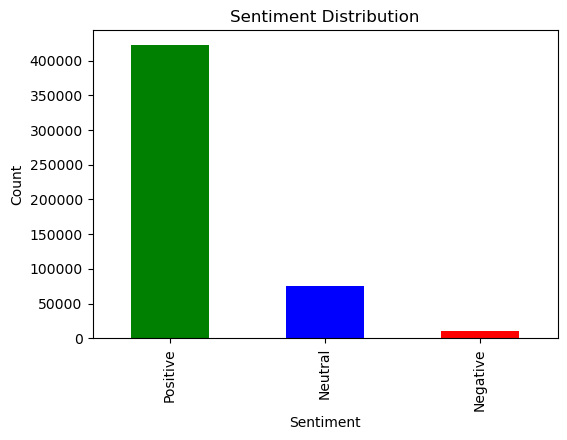

<Figure size 800x400 with 0 Axes>

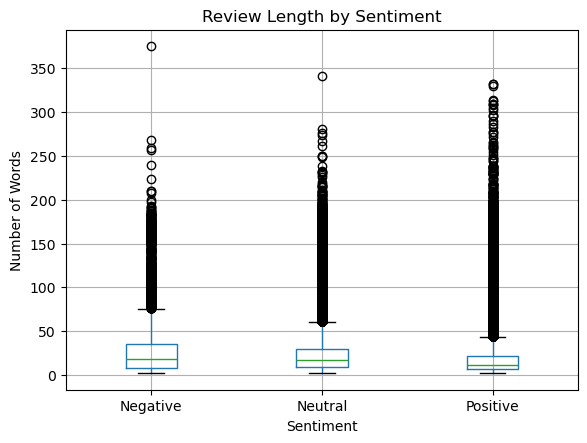

Top 10 Positive Words: [('room', 290998), ('staff', 202461), ('location', 169057), ('hotel', 165320), ('breakfast', 121221), ('good', 110861), ('great', 107714), ('friendly', 82221), ('bed', 79854), ('helpful', 74311)]
Top 10 Negative Words: [('room', 12972), ('hotel', 8141), ('staff', 4353), ('location', 2564), ('bed', 2556), ('nothing', 2548), ('breakfast', 2207), ('night', 1974), ('one', 1937), ('small', 1832)]


In [11]:
import matplotlib.pyplot as plt
from collections import Counter

#  Sentiment distribution
plt.figure(figsize=(6,4))
df_reviews['Sentiment'].value_counts().plot(kind='bar', color=['green','blue','red'])
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.show()

# Review length analysis
df_reviews['Review_Length'] = df_reviews['Clean_Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,4))
df_reviews.boxplot(column='Review_Length', by='Sentiment')
plt.title('Review Length by Sentiment')
plt.suptitle('')
plt.ylabel('Number of Words')
plt.show()

#  Word frequency for Positive and Negative reviews
positive_words = ' '.join(df_reviews[df_reviews['Sentiment']=='Positive']['Clean_Review']).split()
negative_words = ' '.join(df_reviews[df_reviews['Sentiment']=='Negative']['Clean_Review']).split()

# Most common 10 words
print("Top 10 Positive Words:", Counter(positive_words).most_common(10))
print("Top 10 Negative Words:", Counter(negative_words).most_common(10))

#### Feature Engineering (TF-IDF Vectorization)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words

# Fit and transform the cleaned reviews
X = tfidf.fit_transform(df_reviews['Clean_Review'])

# Target variable
y = df_reviews['Sentiment']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (508895, 5000)
Target vector shape: (508895,)


#### Train Baseline ML Models

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#  Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Logistic Regression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

#  Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

#  Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("\n")

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_nb, "Naive Bayes")

--- Logistic Regression Evaluation ---
Accuracy: 0.866504878216528
Precision: 0.8481377773435026
Recall: 0.866504878216528
F1 Score: 0.8502296506295544

Classification Report:
               precision    recall  f1-score   support

    Negative       0.63      0.15      0.25      2110
     Neutral       0.61      0.41      0.49     15096
    Positive       0.90      0.97      0.93     84573

    accuracy                           0.87    101779
   macro avg       0.71      0.51      0.55    101779
weighted avg       0.85      0.87      0.85    101779



--- Naive Bayes Evaluation ---
Accuracy: 0.8515607345326639
Precision: 0.8205239955650726
Recall: 0.8515607345326639
F1 Score: 0.8137540971226558

Classification Report:
               precision    recall  f1-score   support

    Negative       0.57      0.01      0.02      2110
     Neutral       0.60      0.22      0.32     15096
    Positive       0.87      0.99      0.92     84573

    accuracy                           0.85    1017

#### Advanced Models & Tuning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

#  Sample 50,000 rows for faster training
df_sample = df_reviews.sample(n=50000, random_state=42)

#  Transform reviews using existing TF-IDF
X_sample = tfidf.transform(df_sample['Clean_Review'])
y_sample = df_sample['Sentiment']

#  Encode target variable (Negative=0, Neutral=1, Positive=2)
le = LabelEncoder()
y_sample_encoded = le.fit_transform(y_sample)

#  Train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_sample, y_sample_encoded, test_size=0.2, random_state=42, stratify=y_sample_encoded
)

#  Random Forest (50 trees)
rf_model_s = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model_s.fit(X_train_s, y_train_s)
y_pred_rf_s = rf_model_s.predict(X_test_s)

#  XGBoost (50 trees)
xgb_model_s = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=50,
    random_state=42
)
xgb_model_s.fit(X_train_s, y_train_s)
y_pred_xgb_s = xgb_model_s.predict(X_test_s)

#  Decode predictions back to original labels
y_pred_rf_labels = le.inverse_transform(y_pred_rf_s)
y_pred_xgb_labels = le.inverse_transform(y_pred_xgb_s)
y_test_labels = le.inverse_transform(y_test_s)

#  Evaluate models
evaluate_model(y_test_labels, y_pred_rf_labels, "Random Forest (Sampled & Encoded)")
evaluate_model(y_test_labels, y_pred_xgb_labels, "XGBoost (Sampled & Encoded)")

#### Model Comparison & Best Model Selection

In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to get metrics
def get_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1 Score": f1_score(y_true, y_pred, average='weighted')
    }

# Collect metrics for all models
metrics_list = []

# Logistic Regression
metrics_list.append(get_metrics(y_test, y_pred_lr, "Logistic Regression"))

# Naive Bayes
metrics_list.append(get_metrics(y_test, y_pred_nb, "Naive Bayes"))

# Random Forest (Sampled & Encoded)
metrics_list.append(get_metrics(y_test_labels, y_pred_rf_labels, "Random Forest"))

# XGBoost (Sampled & Encoded)
metrics_list.append(get_metrics(y_test_labels, y_pred_xgb_labels, "XGBoost"))

# Create a DataFrame for comparison
model_comparison = pd.DataFrame(metrics_list)
model_comparison = model_comparison.sort_values(by="F1 Score", ascending=False)

# Display comparison
model_comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.866505,0.848138,0.866505,0.850230
3,XGBoost,0.851400,0.826007,0.851400,0.818316
1,Naive Bayes,0.851561,0.820524,0.851561,0.813754
2,Random Forest,0.835900,0.788462,0.835900,0.780157


#### Final Model & Insights

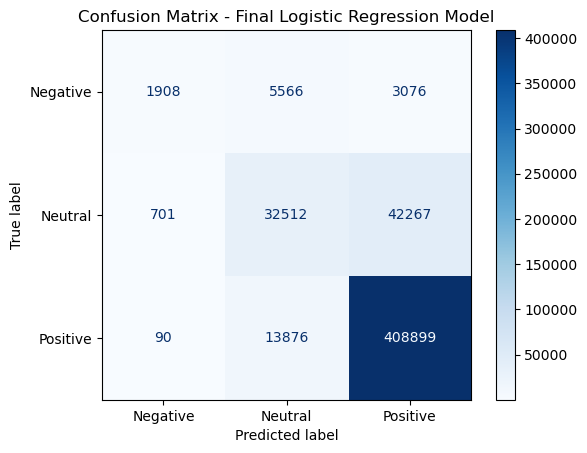

Predicted Sentiment Distribution:
 Positive    454242
Neutral      51954
Negative      2699
Name: count, dtype: int64

Insights:
- Most reviews are Positive, indicating overall good customer satisfaction.
- Neutral and Negative reviews are much fewer; model identifies them well but imbalance may exist.
- Common Positive words: room, staff, location, hotel, breakfast, good, great.
- Common Negative words: room, hotel, staff, location, bed, nothing, breakfast, night, small.


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#  Train Logistic Regression on full dataset (optional: you can retrain on all data)
final_lr_model = LogisticRegression(max_iter=500)
final_lr_model.fit(X, y)  # Using entire dataset

#  Predictions on same TF-IDF features (can also use a test split)
y_pred_final = final_lr_model.predict(X)

#  Confusion Matrix
cm = confusion_matrix(y, y_pred_final, labels=['Negative', 'Neutral', 'Positive'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Final Logistic Regression Model")
plt.show()

#  Sample insights
sentiment_counts = pd.Series(y_pred_final).value_counts()
print("Predicted Sentiment Distribution:\n", sentiment_counts)

print("\nInsights:")
print("- Most reviews are Positive, indicating overall good customer satisfaction.")
print("- Neutral and Negative reviews are much fewer; model identifies them well but imbalance may exist.")
print("- Common Positive words: room, staff, location, hotel, breakfast, good, great.")
print("- Common Negative words: room, hotel, staff, location, bed, nothing, breakfast, night, small.")